In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import os
os.chdir('/Users/Raphael/Github/ML-Stock-Prices/') #Select your working directory
cwd = os.getcwd()
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

import importlib
Functions=importlib.import_module("functions")
Functions=importlib.reload(Functions)

# Import des données

In [3]:
stock_name = "TOT"

stock_prices_serie = Functions.import_stock_price(stock_name, from_ = 2000)

5y


# Traitement des données

In [4]:
lag = 60

sep_train_test = 700

horizon = 0

date_sep = stock_prices_serie.iloc[sep_train_test].name

time_serie_train = stock_prices_serie.close.values.reshape(-1, 1)[:sep_train_test]

time_serie_test = stock_prices_serie.close.values.reshape(-1, 1)[sep_train_test - lag - horizon:]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(time_serie_train)
time_serie_train = sc.transform(time_serie_train)
time_serie_test = sc.transform(time_serie_test)

X_train, Y_train = Functions.transform_data(time_serie_train, lag, horizon)

X_test, Y_test = Functions.transform_data(time_serie_test, lag, horizon)

# Préparation de la structure du modèle

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout



regressor = Sequential()
regressor.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = Y_train.shape[1]))

regressor.compile(loss="mse", optimizer="rmsprop")

/Users/Raphael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Raphael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Training du modèle

In [6]:
regressor.fit(X_train, Y_train, epochs = 10, validation_split=0.5)

Train on 320 samples, validate on 320 samples
Epoch 1/10
320/320 [==============================] - 7s 22ms/step - loss: 0.1123 - val_loss: 0.0125
Epoch 2/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0189 - val_loss: 0.0170
Epoch 3/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0187 - val_loss: 0.0056
Epoch 4/10
320/320 [==============================] - 3s 8ms/step - loss: 0.0213 - val_loss: 0.0052
Epoch 5/10
320/320 [==============================] - 3s 8ms/step - loss: 0.0227 - val_loss: 0.0051
Epoch 6/10
320/320 [==============================] - 3s 8ms/step - loss: 0.0189 - val_loss: 0.0051
Epoch 7/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0234 - val_loss: 0.0049
Epoch 8/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0119 - val_loss: 0.0059
Epoch 9/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0213 - val_loss: 0.0047
Epoch 10/10
320/320 [==============================] 

# Préparation des résultats

In [7]:
Y_train_pred = sc.inverse_transform(regressor.predict(X_train))
Y_test_pred = sc.inverse_transform(regressor.predict(X_test))

vide = np.empty((lag + horizon, 1))
vide[:] = np.nan

stock_prices_serie["prediction"] = np.append(vide, np.append(Y_train_pred, Y_test_pred))

# Affichage des résultats

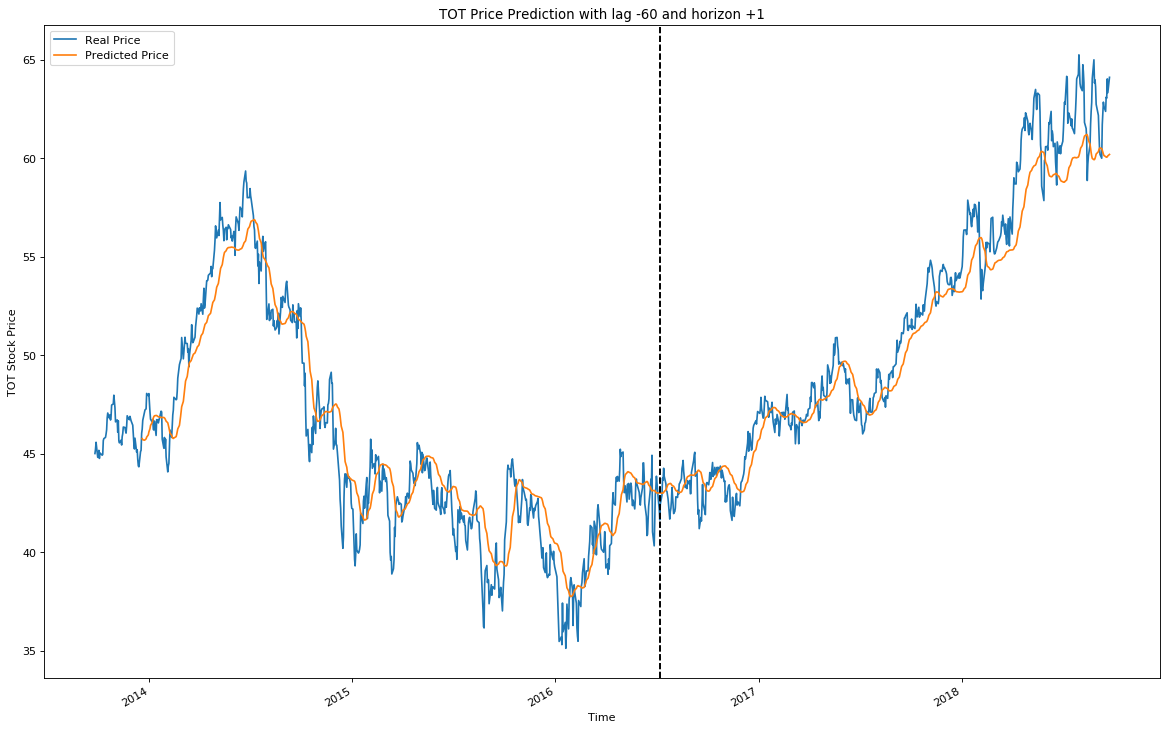

In [13]:
plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')

stock_prices_serie.close.plot(label = 'Real Price')
stock_prices_serie.prediction.plot(label = 'Predicted Price')

plt.title(stock_name + ' Price Prediction with lag -' + str(lag) + " and horizon +" + str(horizon+1))
plt.axvline(x=date_sep, color='k', linestyle='--')
plt.axvline(x=date_sep, color='k', linestyle='--')
plt.xlabel('Time')
plt.ylabel(stock_name + ' Stock Price')
plt.legend()
plt.show()

# Mêmes étapes mais avec un horizon égale à +30 jours

Train on 305 samples, validate on 305 samples
Epoch 1/10
305/305 [==============================] - 9s 29ms/step - loss: 0.1051 - val_loss: 0.0284
Epoch 2/10
305/305 [==============================] - 3s 9ms/step - loss: 0.0496 - val_loss: 0.0161
Epoch 3/10
305/305 [==============================] - 3s 10ms/step - loss: 0.0359 - val_loss: 0.0146
Epoch 4/10
305/305 [==============================] - 3s 9ms/step - loss: 0.0380 - val_loss: 0.0201
Epoch 5/10
305/305 [==============================] - 3s 10ms/step - loss: 0.0343 - val_loss: 0.0324
Epoch 6/10
305/305 [==============================] - 3s 10ms/step - loss: 0.0408 - val_loss: 0.0393
Epoch 7/10
305/305 [==============================] - 3s 10ms/step - loss: 0.0361 - val_loss: 0.0367
Epoch 8/10
305/305 [==============================] - 3s 9ms/step - loss: 0.0373 - val_loss: 0.0208
Epoch 9/10
305/305 [==============================] - 3s 9ms/step - loss: 0.0299 - val_loss: 0.0239
Epoch 10/10
305/305 [============================

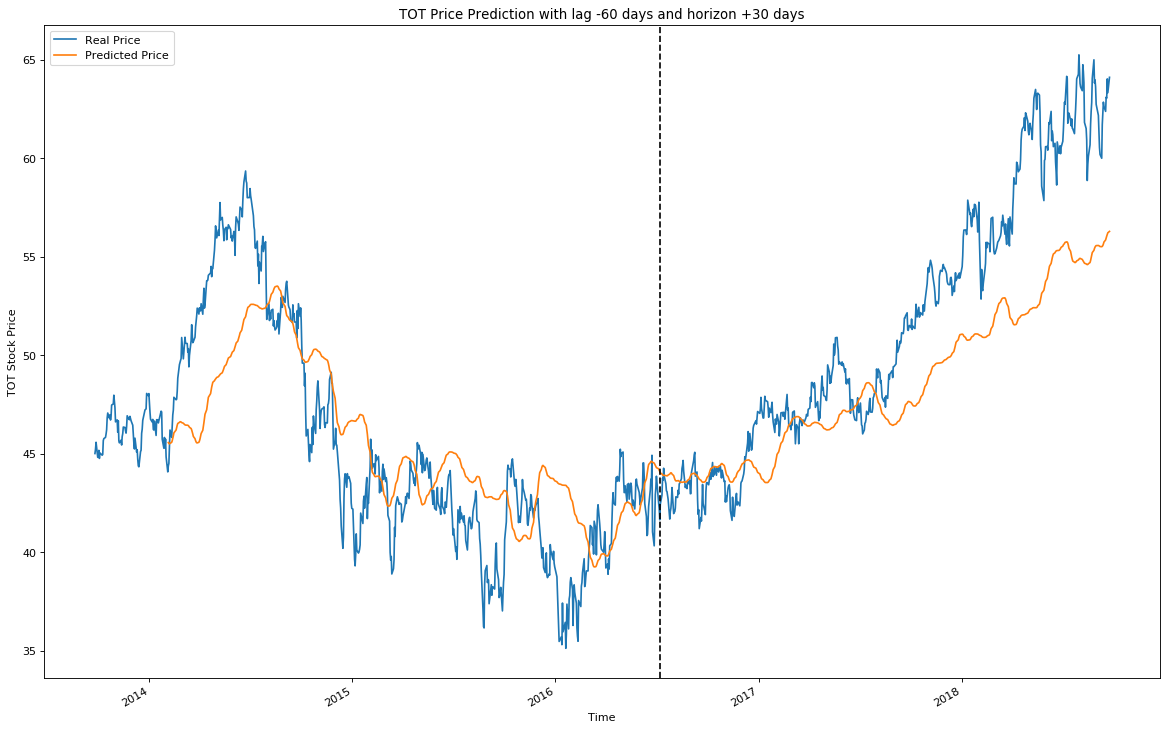

In [17]:
lag = 60

sep_train_test = 700

horizon = 30

date_sep = stock_prices_serie.iloc[sep_train_test].name

time_serie_train = stock_prices_serie.close.values.reshape(-1, 1)[:sep_train_test]

time_serie_test = stock_prices_serie.close.values.reshape(-1, 1)[sep_train_test - lag - horizon:]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(time_serie_train)
time_serie_train = sc.transform(time_serie_train)
time_serie_test = sc.transform(time_serie_test)

X_train, Y_train = Functions.transform_data(time_serie_train, lag, horizon)

X_test, Y_test = Functions.transform_data(time_serie_test, lag, horizon)

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = Y_train.shape[1]))

regressor.compile(loss="mse", optimizer="rmsprop")

regressor.fit(X_train, Y_train, epochs = 10, validation_split=0.5)

Y_train_pred = sc.inverse_transform(regressor.predict(X_train))
Y_test_pred = sc.inverse_transform(regressor.predict(X_test))


vide = np.empty((lag + horizon, 1))
vide[:] = np.nan

stock_prices_serie["prediction"] = np.append(vide, np.append(Y_train_pred, Y_test_pred))

plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')

stock_prices_serie.close.plot(label = 'Real Price')
stock_prices_serie.prediction.plot(label = 'Predicted Price')

plt.title(stock_name + ' Price Prediction with lag -' + str(lag) + " days and horizon +" + str(horizon) + " days")
plt.axvline(x=date_sep, color='k', linestyle='--')
plt.xlabel('Time')
plt.ylabel(stock_name + ' Stock Price')
plt.legend()
plt.show()